## **Basic Implementation Of CNN with feature Maps on Mnist dataset**

### **Importing Libraries**

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Dropout, Conv2D, AveragePooling2D, MaxPooling2D, Flatten
from keras.optimizers import Adam

### **Loading the dataset**

In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

### **Understanding the data**

In [ ]:
len(X_train)

60000

In [ ]:
len(X_test)

10000

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
#two dimensional data
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

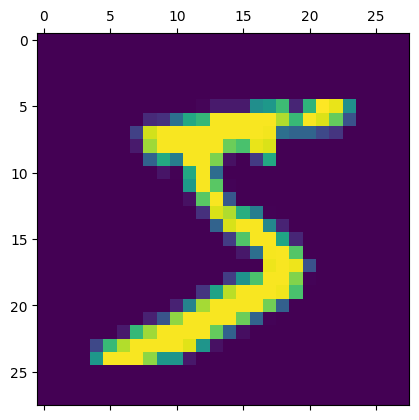

In [ ]:
#input image of the training data
plt.matshow(X_train[0])

In [ ]:
#plt.matshow(X_train[2])

In [ ]:
#plt.matshow(X_train[7])

In [ ]:
Y_train[2]

4

In [ ]:
Y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [ ]:
width = height = X_train.shape[1]

### **Pre-processing**

In [ ]:
#assigns the maximum value of the RGB scale
max_rbg_value = 255

#Reshaping and normalization of the training data
X_train = X_train.reshape((X_train.shape[0],
                          width,
                          height,
                          1)).astype(np.float32)/max_rbg_value

#Reshaping and normalization of the test data
X_test = X_test.reshape((X_test.shape[0],
                          width,
                          height,
                          1)).astype(np.float32)/max_rbg_value

#One-hot encoding of the training and testing labels
Y_train = to_categorical(Y_train, num_classes=10)
Y_test = to_categorical(Y_test, num_classes=10)

### **Model Creation**

In [ ]:
model = Sequential()

model.add(Dropout(.25, input_shape=(width, height, 1), seed=1000))

model.add(Conv2D(filters=16, kernel_size=(3,3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(.5, seed=1000))

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(.5, seed=1000))

model.add(AveragePooling2D(pool_size=(2,2), padding='same'))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same'))
model.add(Activation('relu'))

model.add(AveragePooling2D(pool_size=(2,2), padding='same'))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(.5, seed=1000))

model.add(AveragePooling2D(pool_size=(2,2), padding='same'))

model.add(Flatten())

model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(.5, seed=1000))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(optimizer=Adam(lr=.001,
                             decay=1e-5),
                             loss='categorical_crossentropy',
                             metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_5 (Dropout)         (None, 28, 28, 1)         0         
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 activation_6 (Activation)   (None, 28, 28, 16)        0         
                                                                 
 dropout_6 (Dropout)         (None, 28, 28, 16)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        4640      
                                                                 
 activation_7 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 dropout_7 (Dropout)         (None, 28, 28, 32)       

In [ ]:
# Training model

history = model.fit(X_train, Y_train,
                   epochs=3,
                   batch_size=256,
                   validation_data=(X_test, Y_test))

Epoch 1/3
235/235 [==============================] - 241s 1s/step - loss: 0.4683 - accuracy: 0.8458 - val_loss: 0.1204 - val_accuracy: 0.9641
Epoch 2/3
235/235 [==============================] - 207s 880ms/step - loss: 0.1574 - accuracy: 0.9507 - val_loss: 0.0784 - val_accuracy: 0.9751
Epoch 3/3
235/235 [==============================] - 208s 883ms/step - loss: 0.1202 - accuracy: 0.9624 - val_loss: 0.0544 - val_accuracy: 0.9831


In [ ]:
history.history

{'loss': [0.46832937002182007, 0.15741726756095886, 0.12019529938697815],
 'accuracy': [0.84579998254776, 0.9506999850273132, 0.9623666405677795],
 'val_loss': [0.12038633972406387, 0.07837889343500137, 0.05435936897993088],
 'val_accuracy': [0.9641000032424927, 0.9750999808311462, 0.9830999970436096]}

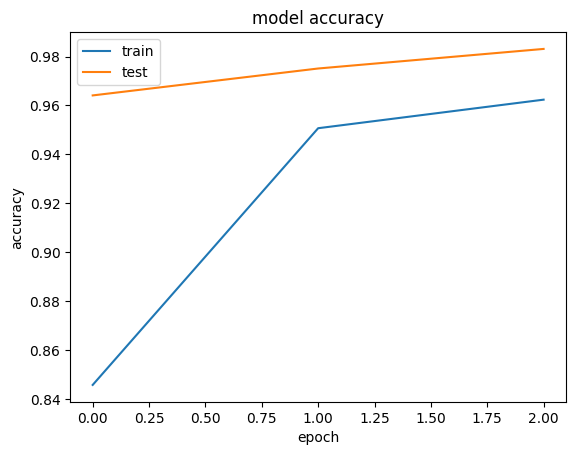

In [ ]:
# Plotting train history:

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()

### **Visualization of feature maps**


In [ ]:
# summarize filter shapes
for layer in model.layers:
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # get filter weights
    filters, biases = layer.get_weights()
    print(layer.name, filters.shape)

conv2d_4 (3, 3, 1, 16)
conv2d_5 (3, 3, 16, 32)
conv2d_6 (3, 3, 32, 64)
conv2d_7 (3, 3, 64, 64)


In [ ]:
# retrieve weights from the second hidden layer
filters, biases = model.layers[1].get_weights()

In [ ]:
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

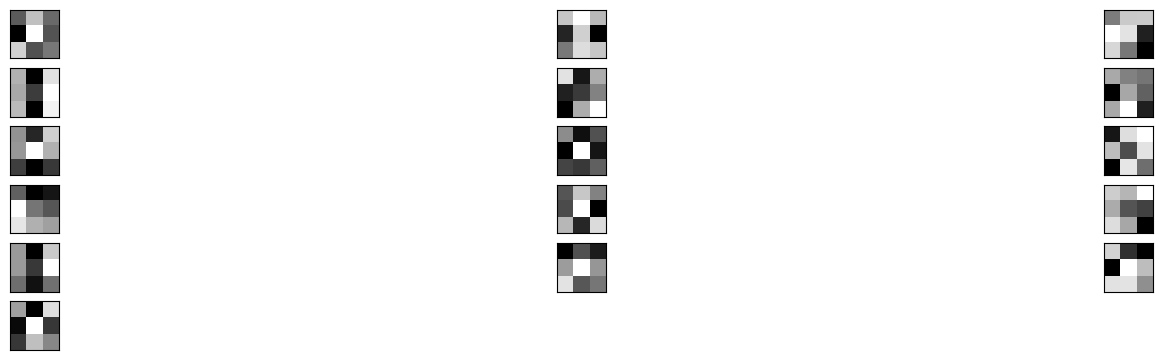

In [ ]:
# plot first few filters
n_filters, ix = 16, 1
plt.figure(figsize=(20,12))
for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # plot each channel separately
    for j in range(1):
        # specify subplot and turn of axis
        ax = plt.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(f[:, :, j], cmap='gray')
        ix += 1
# show the figure
plt.show()

In [ ]:
# redefine model to output right after the first hidden layer
feature_map_model = Model(inputs=model.input, outputs=model.layers[1].output)

feature_map_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_5_input (InputLayer  [(None, 28, 28, 1)]      0         
 )                                                               
                                                                 
 dropout_5 (Dropout)         (None, 28, 28, 1)         0         
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
Total params: 160
Trainable params: 160
Non-trainable params: 0
_________________________________________________________________


In [ ]:
feature_maps = feature_map_model.predict(X_train[0].reshape(1,28,28,1))

1/1 [==============================] - 0s 94ms/step


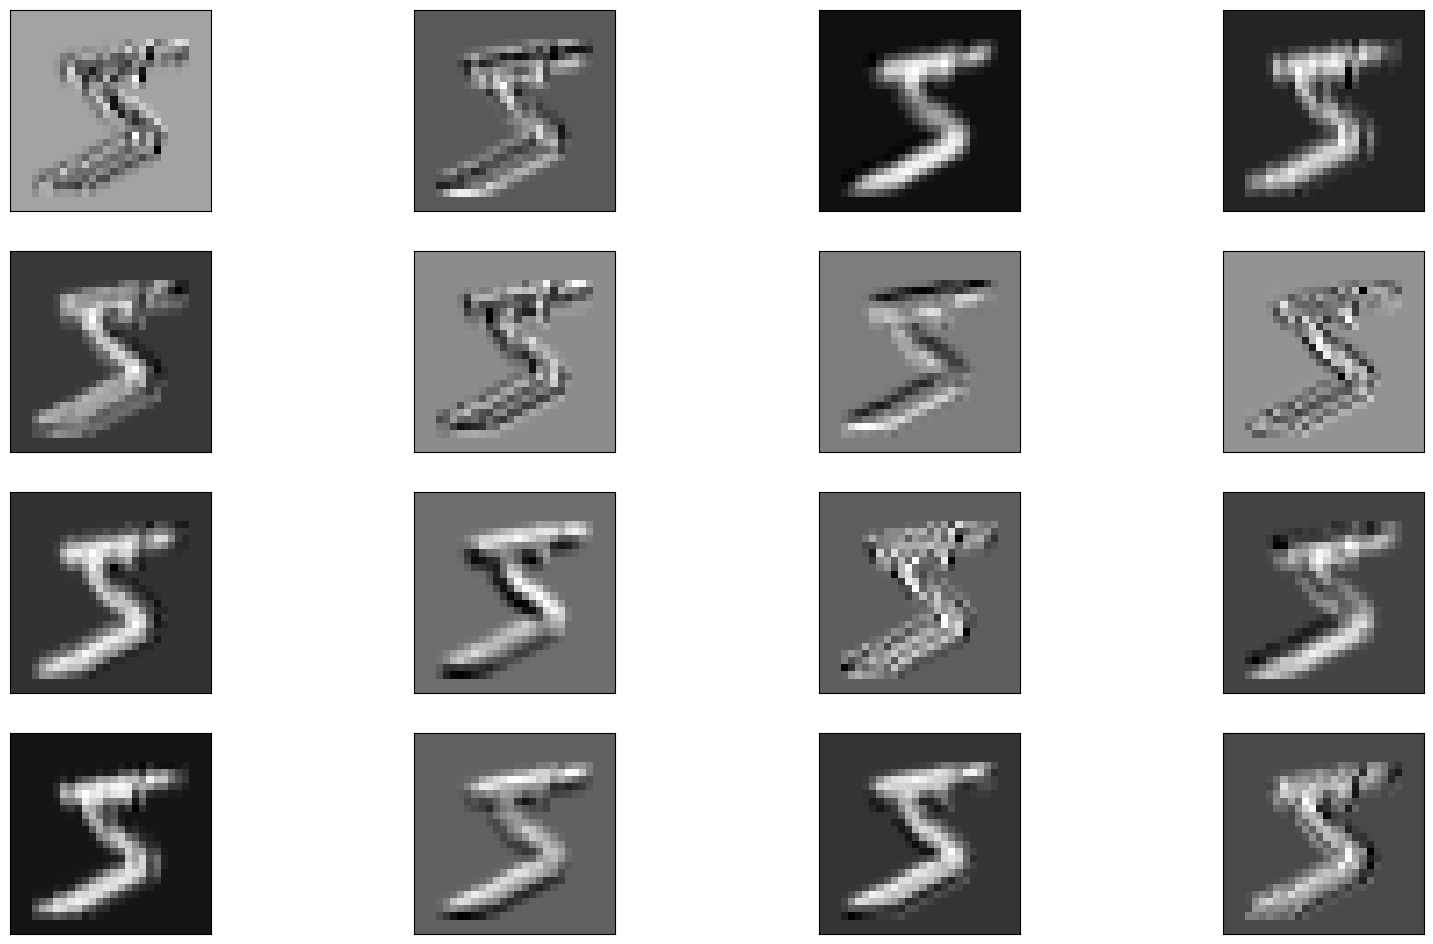

In [ ]:
square = 4
ix = 1
plt.figure(figsize=(20,12))

for _ in range(square):
    for _ in range(square):
        # specify subplot and turn of axis
        ax = plt.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
        ix += 1
# show the figure
plt.show()

In [ ]:
# print feature map from deeper layer

deep_layer = Model(inputs=model.input, outputs=model.layers[9].output)
deep_layer.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_5_input (InputLayer  [(None, 28, 28, 1)]      0         
 )                                                               
                                                                 
 dropout_5 (Dropout)         (None, 28, 28, 1)         0         
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 activation_6 (Activation)   (None, 28, 28, 16)        0         
                                                                 
 dropout_6 (Dropout)         (None, 28, 28, 16)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        4640      
                                                           

In [ ]:
feature_maps = deep_layer.predict(X_train[0].reshape(1,28,28,1))

1/1 [==============================] - 0s 358ms/step


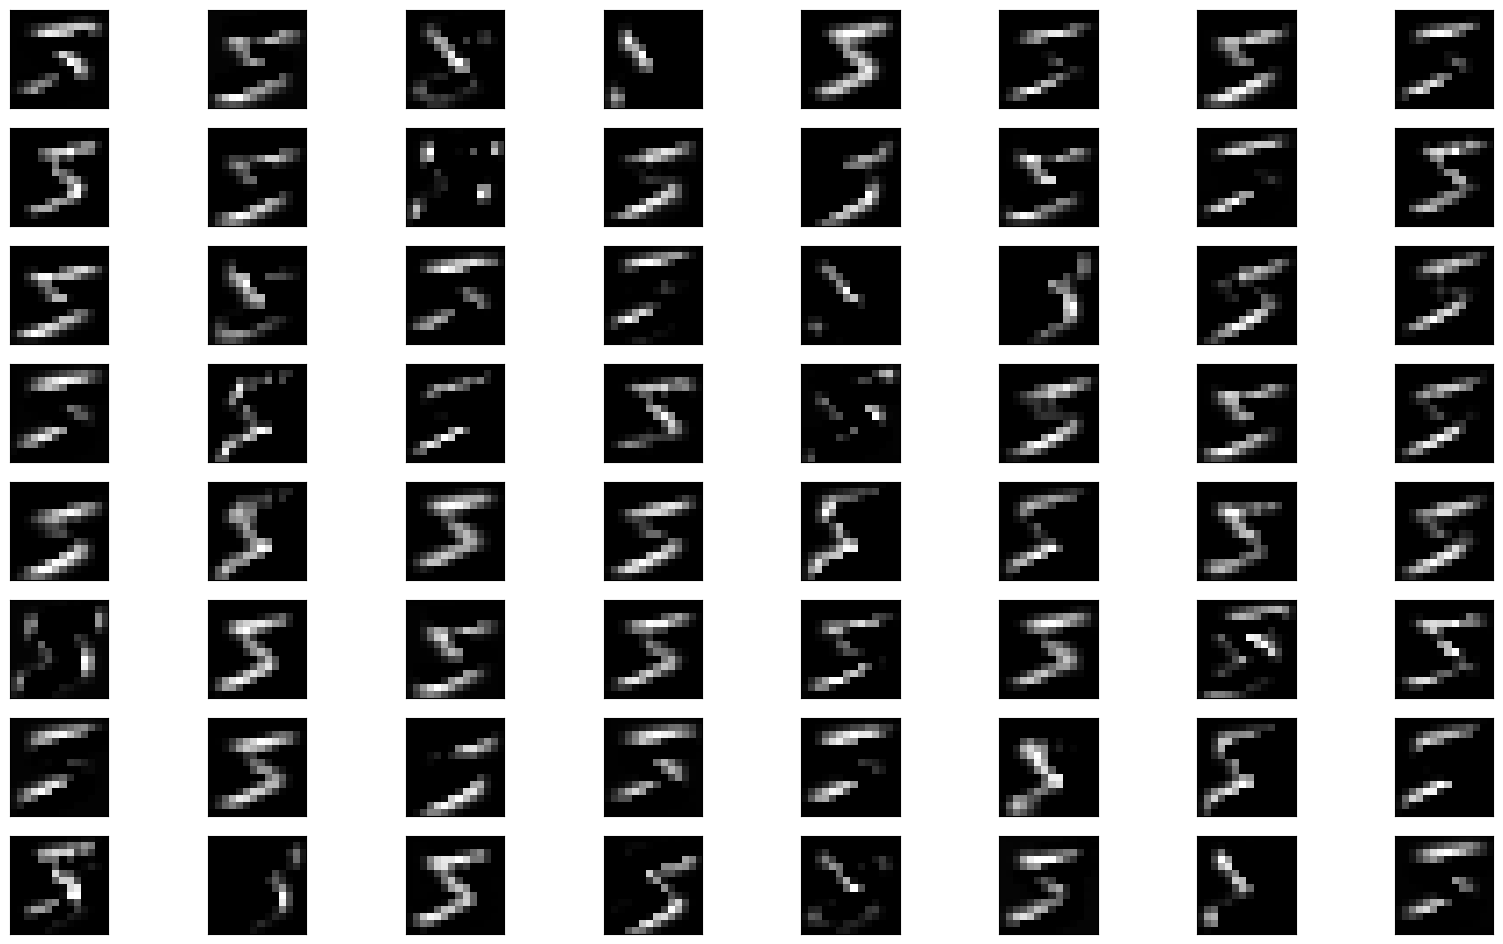

In [ ]:
square = 8
ix = 1
plt.figure(figsize=(20,12))

for _ in range(square):
    for _ in range(square):
        # specify subplot and turn of axis
        ax = plt.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
        ix += 1
# show the figure
plt.show()